# Compare Models


Provide two model paths:

In [1]:
model1 = '/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/ML4L/ML_1648640211/' #standard model, with skt, predicting MODIS LST
model2 = '/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/ML4L/ML_1649072169/' #this is a trained model without  sdor,slt

In [11]:
import pandas as pd
def load_data(path):
    print (path)
    df = pd.read_pickle(path+'predictions.pkl')
    #Create some new columns for the errors
    df['error'] = df.MODIS_LST - df.predictions
    df['error_abs'] = abs(df.MODIS_LST - df.predictions)

    #Surface some useful numbers
    print("Mean error, Median error, Std deviation:",df.error_abs.mean(), df.error_abs.median(),df.error_abs.std())
    print("Mean bias, Median bia, Std deviation:",df.error.mean(), df.error.median(),df.error.std())


    return df
df1 = load_data(model1)
df2 = load_data(model2)
    

/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/ML4L/ML_1648640211/
Absolute error:
--------------------------------
Mean error, Median error, Std deviation: 3.0727212 2.351532 2.7390487
Biased error:
--------------------------------
Mean bias, Median bia, Std deviation: 0.20287068 0.35064697 4.1113067
/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/ML4L/ML_1649072169/
Absolute error:
--------------------------------
Mean error, Median error, Std deviation: 3.16429 2.4346008 2.80639
Biased error:
--------------------------------
Mean bias, Median bia, Std deviation: 0.1934183 0.36904907 4.22506


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mc
import matplotlib.colorbar as cb  
def plot_multiple_distributions(data1,data2,bins):
    
    #seaborn histplot is quite slow for some reason?
    
    
      #Setup plot env
    h,w = 20,20

    sns.set_theme(context='talk', 
                  style='ticks', 
                  palette='deep',
                  rc={'figure.figsize':(h,w)}
                  )

    
    #Figure
    fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(h,w))
    
    
    #Plot
    p1 = sns.histplot(data=data1, x="error", ax=ax1,stat='probability', bins=bins,alpha=0.7,color='C0',label='Model 1')
    p1 = sns.histplot(data=data2, x="error", ax=ax1,stat='probability', bins=bins,alpha=0.7,color='C1',label='Model 2')



    
    # Config
    ax1.set_xlabel('Error', fontsize = 20)    
    ax1.axvline(0,c='0.5', linestyle='--')
    ax1.legend().set_title(None)

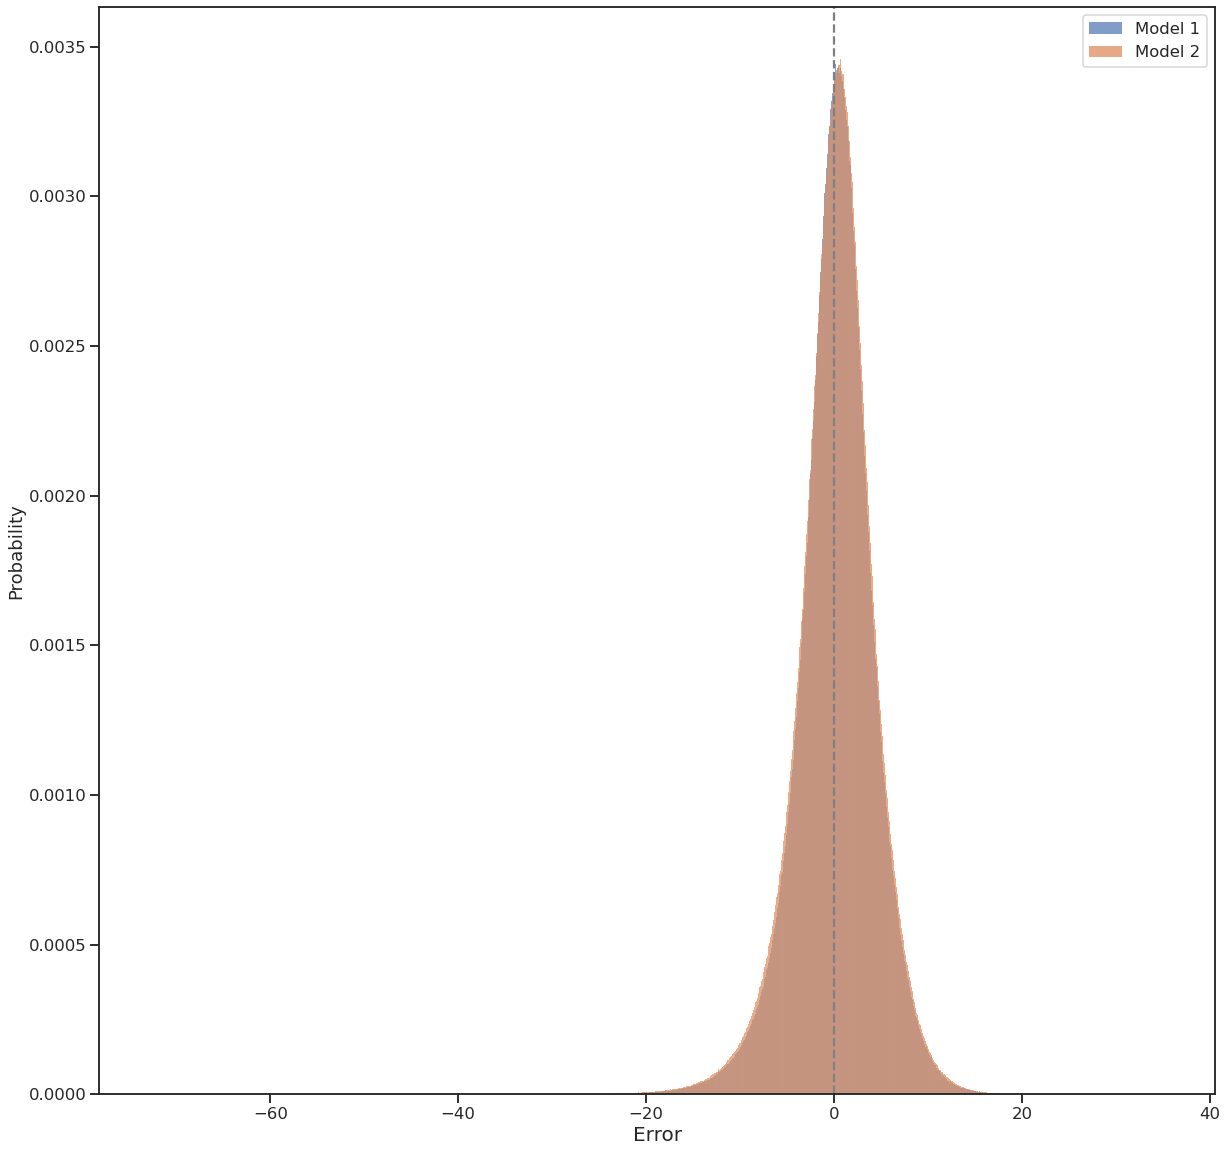

In [13]:
plot_multiple_distributions(df1,df2,bins='auto')

In [17]:
import matplotlib.colors as mc
import matplotlib.colorbar as cb  
def plot_map(df,z,vmin,vmax,cmap,title):
    
    #Get all data as vectors
    x = df.longitude_ERA
    y = df.latitude_ERA
    z1 = df[z]
    
    #Scatter plot it
    # init the figure
    fig,[ax,cax] = plt.subplots(1,2, gridspec_kw={"width_ratios":[50,1]},figsize=(30, 20))

    
    norm = mc.Normalize(vmin=vmin, vmax=vmax)

    cb1 = cb.ColorbarBase(cax, cmap=cmap,
                                norm=norm,
                                orientation='vertical')
    
    
    sc = ax.scatter(x, y,
               s=1,
               c=cmap(norm(z1)),
               linewidths=1, alpha=.7
               )

    ax.set_title(title)
    
    plt.show()
    
    

    
    


In [15]:
df1_averaged = df1.groupby(['latitude_ERA', 'longitude_ERA'],as_index=False).mean()
df2_averaged = df2.groupby(['latitude_ERA', 'longitude_ERA'],as_index=False).mean()

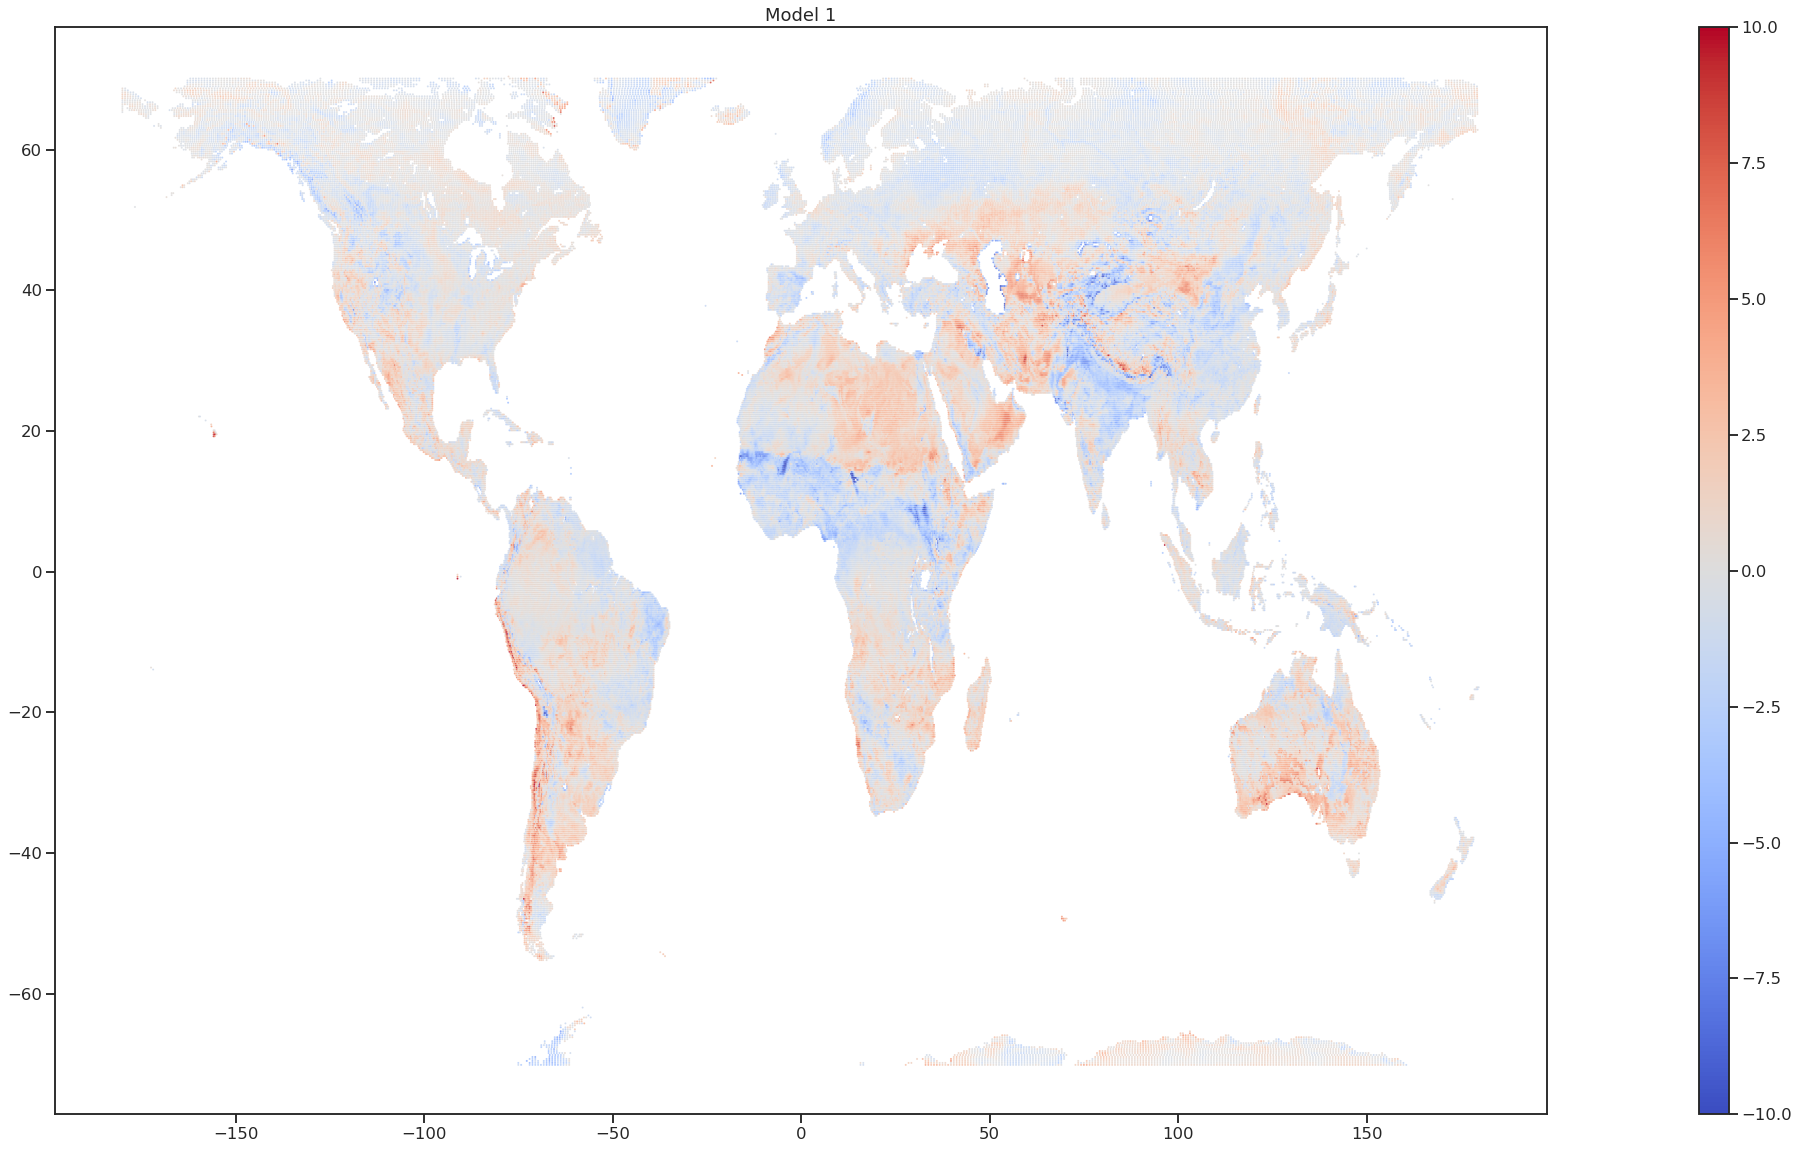

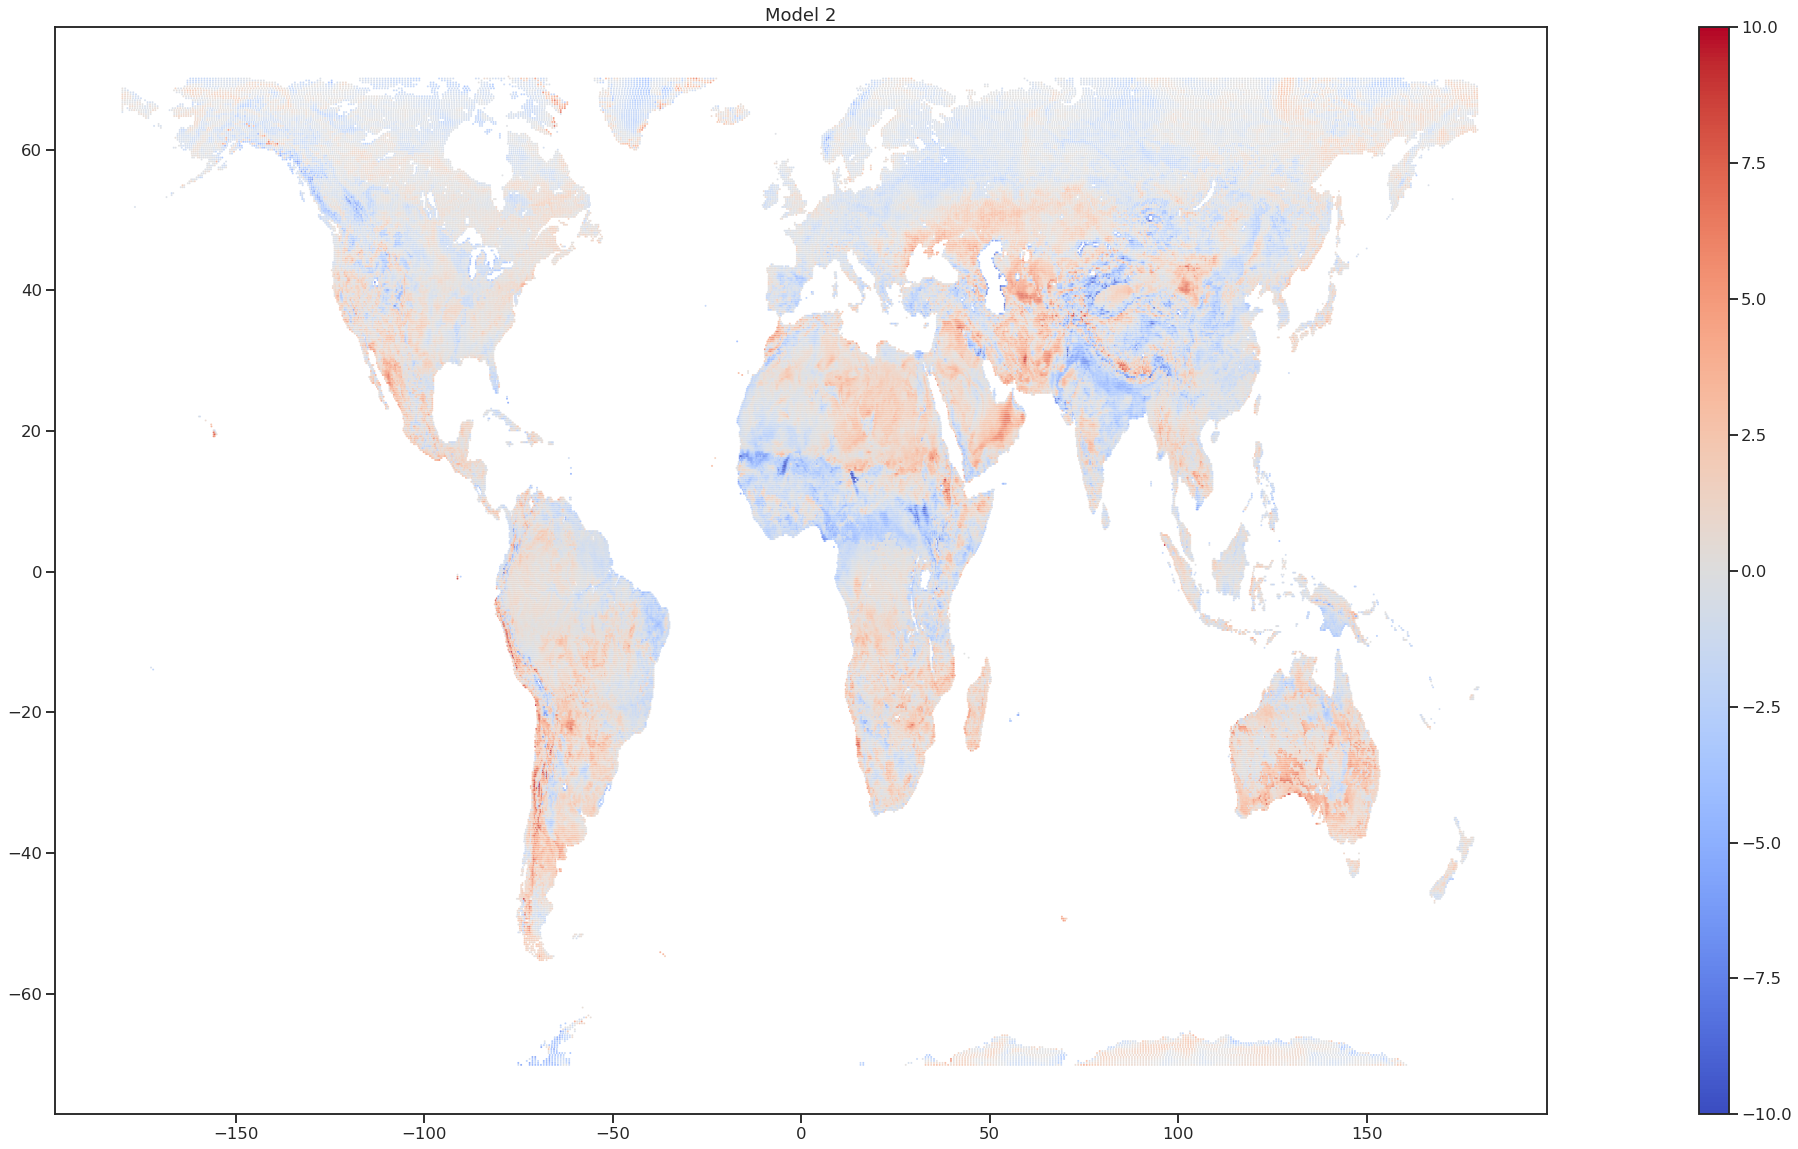

In [18]:
plot_map(df1_averaged,'error',vmin=-10,vmax=10,cmap = plt.cm.coolwarm,title='Model 1')
plot_map(df2_averaged,'error',vmin=-10,vmax=10,cmap = plt.cm.coolwarm,title='Model 2')

In [19]:
df1_averaged

,latitude_ERA,longitude_ERA,skt,t2m,MODIS_LST,lsm,predictions,error,error_abs
0,-70.117048,-75.00,267.523254,268.018524,258.831116,0.784160,260.373260,-1.542151,4.037996
1,-70.117048,-74.25,266.335052,267.445801,258.180634,0.998719,261.159973,-2.979350,5.016819
2,-70.117048,-72.00,265.259064,266.230499,258.371704,1.000000,260.824341,-2.452615,5.606414
3,-70.117048,-71.25,264.919800,267.397461,258.003479,0.998763,261.461548,-3.458066,5.345096
4,-70.117048,-70.50,265.298828,267.467743,257.969513,0.922061,260.828918,-2.859408,5.870546
...,...,...,...,...,...,...,...,...,...
139661,70.117048,157.50,265.965454,264.239624,261.431122,0.974882,263.235352,-1.804245,3.434957
139662,70.117048,158.25,265.694794,264.288574,261.097992,0.880638,263.286469,-2.188496,3.539733
139663,70.117048,159.00,266.292938,264.389832,261.463745,0.667156,263.219055,-1.755303,3.505272
139664,70.117048,159.75,265.450348,263.384979,261.017151,0.678122,262.176910,-1.159747,3.282696


In [20]:
df2_averaged

,latitude_ERA,longitude_ERA,skt,t2m,MODIS_LST,lsm,predictions,error,error_abs
0,-70.117048,-75.00,267.523254,268.018524,258.831116,0.784160,260.834442,-2.003323,4.542778
1,-70.117048,-74.25,266.335052,267.445801,258.180634,0.998719,264.608551,-6.427914,6.861116
2,-70.117048,-72.00,265.259064,266.230499,258.371704,1.000000,263.631287,-5.259554,6.355594
3,-70.117048,-71.25,264.919800,267.397461,258.003479,0.998763,263.403625,-5.400136,6.176591
4,-70.117048,-70.50,265.298828,267.467743,257.969513,0.922061,262.966614,-4.997107,6.342650
...,...,...,...,...,...,...,...,...,...
139661,70.117048,157.50,265.965454,264.239624,261.431122,0.974882,264.120331,-2.689223,3.889441
139662,70.117048,158.25,265.694794,264.288574,261.097992,0.880638,264.190613,-3.092642,4.022367
139663,70.117048,159.00,266.292938,264.389832,261.463745,0.667156,264.307495,-2.843749,4.062591
139664,70.117048,159.75,265.450348,263.384979,261.017151,0.678122,263.000885,-1.983723,3.414831


In [22]:
df2_predictions = df2_averaged['predictions']
df1_averaged['df2_predictions'] = df2_predictions
df1_averaged['prediction_delta'] = df1_averaged['predictions'] - df1_averaged['df2_predictions']

In [25]:
df1_averaged.prediction_delta.min()

-5.471161

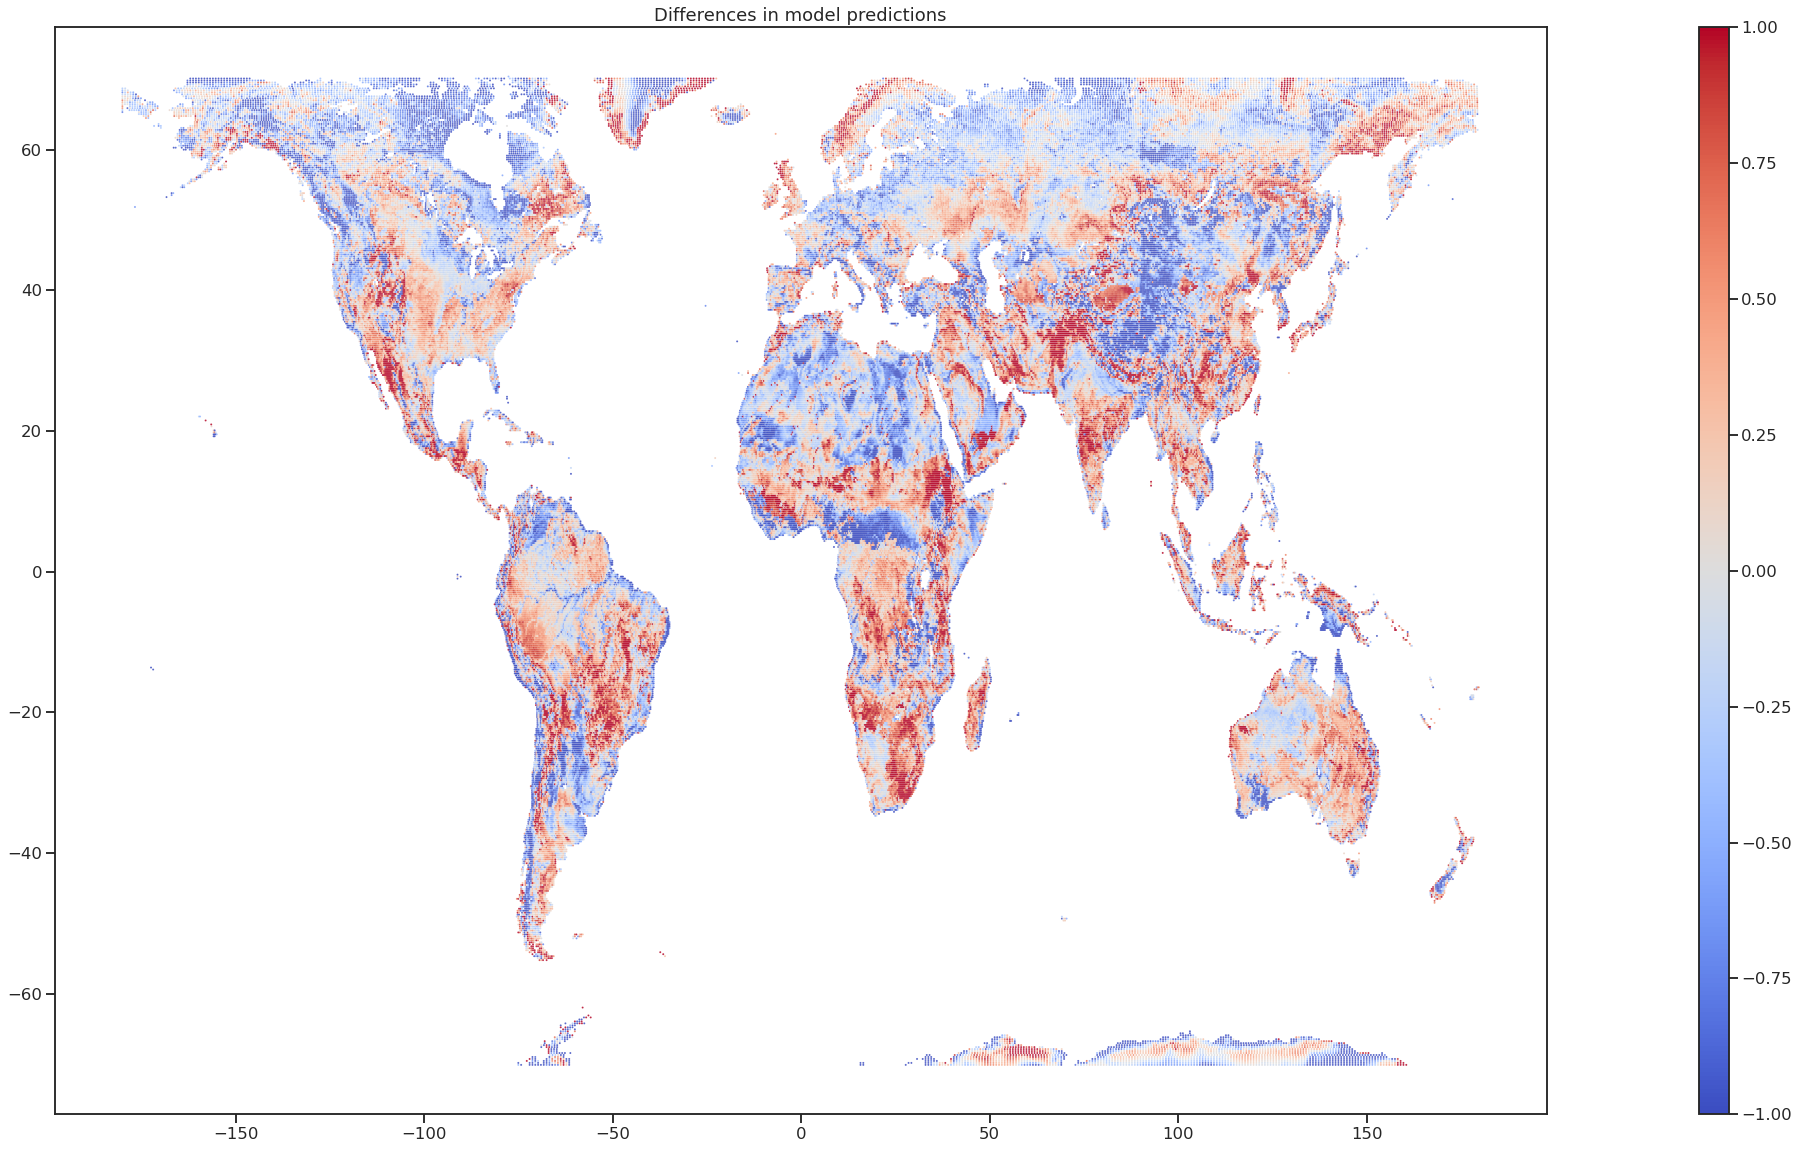

In [29]:
plot_map(df1_averaged,'prediction_delta',vmin=-1,vmax=1,cmap = plt.cm.coolwarm,title='Differences in model predictions')